# Drug Review Data Science

### Author : Avash Monajemi

## (1) Background Information

### 1.1 Introduction to Drug Reviews

This dataset is regarding 215063 observations of drug reviews and other variables that provide additional information to their review.

##### How was this data created?
- The answer is through web scraping. Web scraping is the act of gathering specific data and copying it from the web into a database or spreadsheet for purposes of data analysis. To explain further, all of the information and variables in this dataset are located somewhere on the web page of reviews and is compiled into distinct columns of information. Members of the UCI machine learning repository are acredited for creating this dataset by looking through pharmaceutical review sites and web scraping relevant information.

##### What is a drug review anyway?
-  A drug review notes a patient's critique of a drug they consumed. A patient decides to use a drug to stabilize symptoms (physical or mental characteristics) due to their condition/disease, and they make a note of reactions to the drug & effectiveness in curing symptoms related to their condition. Thus, drug reviews could potentially be of neutral language because some patients may have positive feelings regarding their drugs effectiveness to cure symptoms of their current condition, but may be unhappy with the side effects. For example, the government of South Australia notes the importance of drug effects when they note, "sometimes unwanted side-effects may be produced and the potential benefits of the medicine need to be weighed up against the risk of side-effects" (Source: sahealth.sa.gov.au). For our data, we expect that most drug reviews will not be completely positive as they often have side effects.

-  **Example** : "I took this Bumex drug and it has been helping my high blood pressure condition for two weeks now! However, I am very upset with the side-effects as I have experienced slow muscle movements and intense fatigue."



### 1.2 Additional Variable Information / Importance

We have already explained the meaning and context behind a drug review which is 1 out of the 6 variables in our data. Now we will explain the supporting variables.


##### Drug Name
-  The drug name is simply the name of the drug that the patient consumed to treat their condition/disease. These drugs can be of different shapes and states such as liquids or solid tablets. More importantly, some patients used a combination drug which consists of two different drugs used together to treat a condition, and this is noted by a " / " in the variable.

-  **Example of drug forms** The drug Buprenorphine used to treat opiod addictions is given in the form of a tablet or pill.

-  **Example of combination drugs** In our data, there are cases where a patient used the combination drug Buprenorphine / naloxone instead of Buprenorphine alone. In fact, the condition of treating opiod addictions, it is common for patients to consume this combination drug after they had consumed Buprenorphine alone (Source: MayoClinic 2019).

##### Condition
-  Firstly, we must note that the term "Condition" in this variable comprises of many different types of disorders, diseases, illnesses, infections, syndromes, and the like. One key distinction between some conditions is curable vs. non-curable. Furthermore, there are key differences in these different types of conditions and understanding them could be very important to analyzing why patient's satisfaction level may be lower for one classification of condition than another.


-  **Example** A *syndrome* is a collection (1 or more) distinct symptoms that characterize a *disease*.


##### Rating
-  This variable is seen throughout many different discussions of topics or establishments. The rating of the drug essentially describes the satisfaction level out of 10 in this data. The Rating ranges from 1 to 10 and larger values represent higher satisfaction. There could be many factors or attributes that are correlated with rating and we will explore them further.


##### Date
-  This variable is very self-explanatory. The date column in this data shows the day, month, and year in which the review was written online. Why might this be important? There are relationships with seasons and health related measures and we can examine what these are.


##### Useful Count
-  The number of useful marks a drug review has indicates the number of people that found the review useful. Basically, if there are more useful marks we can regard that review as very useful, and those that have little to none may not be useful. However, it is very important to attach meaning to what "useful" might indicate when someone reads a review. We will explore this deeper later but for now a preliminary thought can be **patients regard a review as useful if they have discovered new or specific-patient related insight they did not know before**.


## (2) Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import sys
!{sys.executable} -m pip install pandasql
from pandasql import sqldf
from pandasql import *
import calendar
pysqldf = lambda q: sqldf(q, globals())

In [2]:
reviews=pd.read_csv('drugsComTrain_raw.csv')
reviews.shape

(161297, 7)

In [3]:
reviews1=pd.read_csv('drugsComTest_raw.csv')
reviews1.shape

(53766, 7)

In [4]:
Reviews=pd.concat([reviews, reviews1])
Reviews=pd.DataFrame(pysqldf("SELECT drugName,condition,review,rating,date,usefulCount FROM Reviews;"))
Reviews.shape

(215063, 6)

In [5]:
Reviews.head(10)

,drugName,condition,review,rating,date,usefulCount
0,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


This data is the original form of the dataset that we will work with and modify through the remainder of the analyses.

### 2.1 Preliminary Text/Review Analyses

Our first analyses will focus on exploring the review text data and generating some summaries and visualizations

In [6]:
Reviews['word_count'] = Reviews['review'].apply(lambda x: len(str(x).split(" ")))
Reviews.word_count.describe()

count    215063.000000
mean         85.632029
std          45.323405
min           1.000000
25%          49.000000
50%          85.000000
75%         127.000000
max        1857.000000
Name: word_count, dtype: float64

The first point we should note in analyzing word count distributions is that a review having 1857 words is a very large text that is much larger, over 10 times larger, than the 75th percentile of word count which is 127. We can neglect this outlier for visualizing distributions. Furthermore, a review that is as large as 1857 words may not differ with respect to other measures as one that is already high enough at the 99.9th percentile.

[Text(0,0.5,'Respective Counts'), Text(0.5,0,'Rating')]

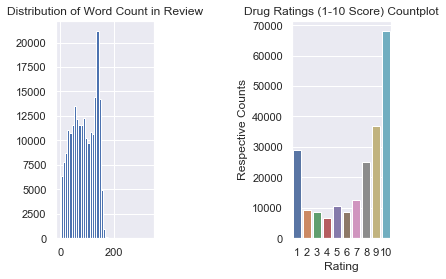

In [30]:
Reviews1=Reviews[Reviews.word_count <= Reviews.word_count.quantile(.9995)]
import matplotlib.pyplot as plt
plt.subplot(1, 3, 1)
Reviews1['word_count'].hist(bins=40)
plt.title("Distribution of Word Count in Review")
plt.subplot(1,3,3)
import seaborn as sns
ax = sns.countplot(x="rating", data=Reviews)
ax.set_title("Drug Ratings (1-10 Score) Countplot")
ax.set(xlabel='Rating',ylabel='Respective Counts')



The plot on the left shows the distribution of # words in the review. We notice the histogram is rather unimodal and has a clear peak at around 130 words representing the most common amount of words used in a review. It is rather difficult to tell if the distribution is skewed rightly or leftly, however since the median is ever so slightly less than the mean, the distribution can be considered as right skewed. The spread is from 0 to about 300 indiciated by the plot.

The plot on the right indicates the distribution of drug ratings. We see that most commonly, people are rating the drug very highly and probably effectively in the the range of 8 - 10 ratings, with 10/10 being the most common. The 4th most likely rating a drug user would give is the lowest rating : 1. Clearly there is a large seperation of ratings here.

We are curious whether there is a relationship between the rating and the average number of useful counts, as well as the rating and the average word counts used in their detailed review on the drug. 

[Text(0,0.5,'Average Word Count'), Text(0.5,0,'Rating')]

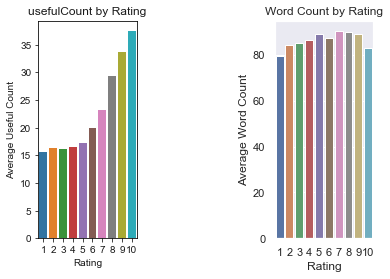

In [8]:
RatingUseful=pd.DataFrame(pysqldf("""SELECT rating, AVG(usefulCount) AS Average_usefulCount FROM Reviews GROUP BY rating"""))
plt.subplot(1,3,1)
ax = sns.barplot(x="rating", y="Average_usefulCount", data=RatingUseful)
ax.set_title("usefulCount by Rating")
ax.set(xlabel='Rating',ylabel='Average Useful Count')
import seaborn as sns; sns.set(color_codes=True)
WordCounts=pd.DataFrame(pysqldf("""SELECT rating, AVG(word_count) AS Average_WordCount FROM Reviews GROUP BY rating"""))
plt.subplot(1,3,3)
ax = sns.barplot(x="rating", y="Average_WordCount", data=WordCounts)
ax.set_title("Word Count by Rating")
ax.set(xlabel='Rating',ylabel='Average Word Count')



From above there is a clear relationship between the rating of the drug and the useful count. It seems that viewers tend to mark positively rated drugs as being useful more often than for drugs with a low rating. Furthermore, extreme ratings of 1 and 10 for the drug correspond to on average having shorter reviews by about 10 word in length compared to those with more neutral scores. This could be explained by the fact that reviews that are a mix of positive and negative feedback require longer arguments of explaining two sentiments than for those that are purely positive or negative.

We will now clean up our review data to construct a visualization of the common words reviewers use in their drug review

In [9]:
Reviews['review'] = Reviews['review'].apply(lambda x: " ".join(x.lower() for x in x.split()))  #Lower Case
Reviews['review'] = Reviews['review'].str.replace('[^\w\s]','')  #punctuation elimination
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
Reviews['review']= Reviews['review'].apply(lambda y: " ".join(y for y in y.split() if y not in stop)) #Removal of english stopwords



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Javacash\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
new_stopwords = ['drug','effect','effects', 'using','affect','medication','medicine','hurt','problem','treatment','symptom','week','month','day','took', 'take', 'months', 'days', 'weeks','like','used','use','well','know','prescribed','give','would','time','gave','pill']
Reviews['review']= Reviews['review'].apply(lambda y: " ".join(y for y in y.split() if y not in new_stopwords))

In [11]:
Reviews["review"] = Reviews["review"].str.replace("[^a-zA-Z#]", " ") #Special Character Removal

In [12]:
freq = pd.Series(' '.join(Reviews["review"]).split()).value_counts()[:10]
freq
Reviews["review"]= Reviews["review"].apply(lambda x: " ".join(x for x in x.split() if x not in freq.index)) #Removing the 10 most common words
Reviews["review"].head()

0                     combination bystolic mg fish oil
1    son halfway fourth intuniv became concerned be...
2    another oral contraceptive cycle happy light p...
3    time form birth control glad went patch decrea...
4    suboxone completely turned life around feel he...
Name: review, dtype: object

In [13]:
Reviews["review"] = Reviews["review"].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3])) # Removing words of length less than 3

In [14]:
tokenized_Review = Reviews["review"].apply(lambda x: x.split())
tokenized_Review.head() #Tokenization

0                        [combination, bystolic, fish]
1    [halfway, fourth, intuniv, became, concerned, ...
2    [another, oral, contraceptive, cycle, happy, l...
3    [time, form, birth, control, glad, went, patch...
4    [suboxone, completely, turned, life, around, f...
Name: review, dtype: object

In [15]:
import nltk
nltk.download('wordnet')  #Lemmatization
from textblob import Word
Reviews["review"]= Reviews["review"].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
Reviews["review"].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Javacash\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                            combination bystolic fish
1    halfway fourth intuniv became concerned began ...
2    another oral contraceptive cycle happy light p...
3    time form birth control glad went patch decrea...
4    suboxone completely turned life around feel he...
Name: review, dtype: object

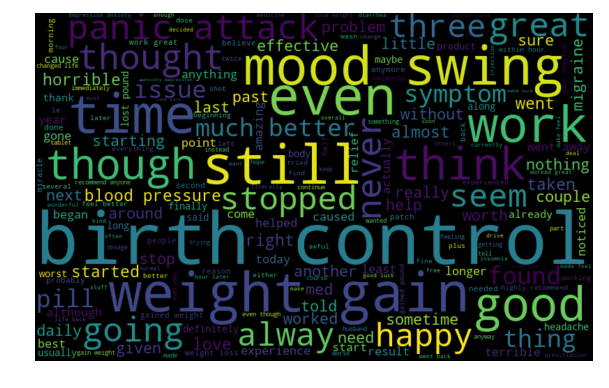

In [16]:
all_words = ' '.join([text for text in Reviews["review"]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

The visualization above is a lot to take in. This is called a word cloud. It shows the most common words that appear in the drug reviews after we have structured our text data in such a way that only relevant words will be used in this analysis. This is why you will not find "effect", "drug", or "medicine" in this visualization because they are too common to be recognized as meaningful, everybody uses these words in their review and so they are removed for this purpose. More significant words are larger in text and reflect higher counts of usage. We see that in particular, reviewers are complaining highly about mood wings (a common side effect many drugs create), weight gain, and panick attacks, and migranes. To describe these experiences, they are noting certain adjectives such as horrible. Reviewers also note positive words such as happy, much better, great, effective, and good luck which probably describe their positive experiences.

We should note finally that a word cloud is simply a preliminary exploration for diving in to see what reviewers are discussing in their reviews. It will not tell us in detail how a particular user felt about their drug intake experience, what the overall topic one is discussing, and more advanced information about the text. Will will conduct more detailed analysis following. 

### 2.2 Sentiment Analysis of Drug Reviews

Now we will provide sentiment analysis for the drug reviews. Sentiment analysis is a field that is part of Natural Language Processing (NLP) that uses algorithms to identify opinions in text data. Structuring text data and gaining actionable insight from it is very import in product analytics and to provide advanced product reccomendations in industry. Relevant information from sentiment analysis could be

- *Polarity* : Expressing a positive or negative opinion (scored on [-1,1])
- *Subject*  : The main topic that is being discussed

##### What are Opinions?

Because textual information can be easily seperated into facts vs opinions, we should properly define their differences first.

-  Facts are **objective** comments regarding a topic
-  Opinions are **subjective** in that they include a user's feeling and sentiments (usually in the form of adjectives) of a topic.

-  Example : **Fact** : This reccomended amount of duration to intake this drug is 3 weeks
-  Example : **Opinion** : The duration for taking this drug to cure my insomnia is too long!

##### Methods for expressing Opinions

There are a number of ways to express opinions and some may not seem obvious at first hand and sentiment analysis may have a harder time detecting these.

-  One can blunty state that Drug A is horrible, however they may also use comparison and say Drug B is better than Drug A.

-  Some opinions express facts, but at advanced level may be seen as opinions.
-  **Example** : "This drug made me feel so much better" vs "I only had to use the drug for one day". Both can be seen as positive, but the latter we expect could be harder to classify as positive.


##### How Sentiment Analysis Works

-  There are rule-based methods that analyze words in the text and identify the negative words and positive words. The count of these is then compared to see if  the overall sentiment is positive, negative, or neutral. 

-  There are automatic approaches that rely on machine learning techniques and it is modeled as a classification problem where the algorithm reads the text data and returns if it is positive, negative, or neutral.

-  In our approach, we will use the Textblob NLTK package to analyze the sentiments. It is based on a **Naive Bayes Classifier** that will be used to make the conclusions, and although we could train our own we will make it simple and use the one by default. 

##### Limitations

-  Because sentiment analysis is a hard process to classify a given text, it will not be correct 100% of the time. However, for general purpose usage, getting it incorrect around 20% of the time is something we must accept and it can still be valid to use it for exhibiting certain trends.

- For example, double negations in a text could be very misleading and is often hard to detect as negative or positive by the algorithm

In [17]:
from textblob import TextBlob
Reviews['sentiment'] = Reviews['review'].apply(lambda x: TextBlob(x).sentiment[0])

In [18]:
import datetime
Reviews['year'] = pd.DatetimeIndex(Reviews['date']).year
Reviews['month'] = pd.DatetimeIndex(Reviews['date']).month
Reviews['day'] = pd.DatetimeIndex(Reviews['date']).day

Reviews.head()


,drugName,condition,review,rating,date,usefulCount,word_count,sentiment,year,month,day
0,Valsartan,Left Ventricular Dysfunction,combination bystolic fish,9,20-May-12,27,17,0.000000,2012,5,20
1,Guanfacine,ADHD,halfway fourth intuniv became concerned began ...,8,27-Apr-10,192,141,0.193889,2010,4,27
2,Lybrel,Birth Control,another oral contraceptive cycle happy light p...,5,14-Dec-09,17,133,0.152273,2009,12,14
3,Ortho Evra,Birth Control,time form birth control glad went patch decrea...,8,3-Nov-15,10,89,0.270000,2015,11,3
4,Buprenorphine / naloxone,Opiate Dependence,suboxone completely turned life around feel he...,9,27-Nov-16,37,134,0.163333,2016,11,27


Now that we have the sentiment scores in the range [-1,1] for all observations, we want to see what the relationship between sentiment scores and other important variables in this data are. It would be interesting to see if there is a special relationship between the year of the rating of the review and the average sentiment score. Similarly, we'd like to find the relationship between the year of the rating and the average rating score itself.

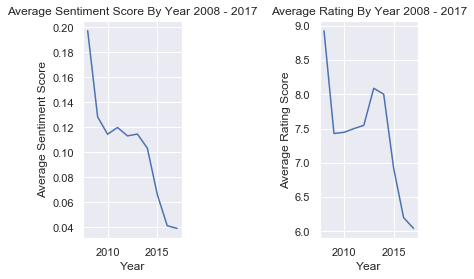

In [19]:
Sentiment_ByYear=pd.DataFrame(pysqldf("""SELECT year, AVG(sentiment) AS Average_Sentiment FROM Reviews GROUP BY year"""))
import matplotlib.pyplot as plt
plt.subplot(1,3,1)
plt.plot(Sentiment_ByYear.year, Sentiment_ByYear.Average_Sentiment)
plt.title('Average Sentiment Score By Year 2008 - 2017')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
Rating_ByYear=pd.DataFrame(pysqldf("""SELECT year, AVG(rating) AS Average_Rating FROM Reviews GROUP BY year"""))
plt.subplot(1,3,3)
plt.plot(Rating_ByYear.year,Rating_ByYear.Average_Rating)
plt.title('Average Rating By Year 2008 - 2017')
plt.xlabel('Year')
plt.ylabel('Average Rating Score')
plt.show()

We see an alarming trend in both the average sentiment score on year, and the average rating score on year. In the case of average sentiment score, they have been dropping almost consistently from the year 2008 to 2017. With the case of avrage rating score on year, a similar trend does show with the exception of a duration of increase between 2010 and 2013.

To someone who is reading this without medical knowledge, they may be surprised at the results. Though the time span is only 9 years, it is still surprising why the scores of the drugs are dropping overall, when we would expect medical technology and  discovery to be advancing thus possibly raising the sentiment/rating of the drugs. There may be some reasons for this.

Also we note as well that the average sentiment score by year did remain positive throughout the time frame, however in recent years of 2015 - 2017 we seem to be getting closer to neutral reviews.

Because there are similar trends looking at sentiment scores and ratings, we may be able to say at this point that there is a relationship between them : the higher the rating the higher the sentiment score, on average.

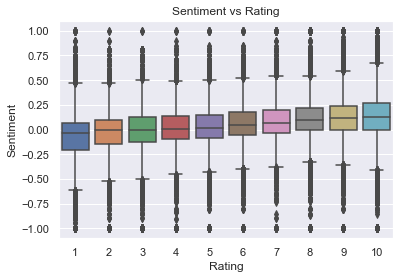

In [20]:
sns.boxplot(x=Reviews.rating,y=Reviews.sentiment)
plt.xlabel("Rating")
plt.ylabel("Sentiment")
plt.title("Sentiment vs Rating")
plt.show()

Looking at the boxplots above indeed there is a positive association between the rating and the sentiment score. This means that the relationship between rating and review sentiment, in general, is rather consisent and a review of high sentiment in many cases returns a high rating and vise versa.

### 2.3 Seasonality Importance

Now we would like to observe a seasonality effect. To do this lets examine the drug review rating across all the months

In [21]:
Reviews=pd.DataFrame(pysqldf("""SELECT *, CASE WHEN month in (12,1,2) THEN 'Winter'
                                                  WHEN month BETWEEN 9 AND 11 THEN 'Autumn'
                                                  WHEN month BETWEEN 6 and 8 THEN 'Summer'
                                                  WHEN month BETWEEN 3 AND 5 THEN 'Spring' END AS Season FROM Reviews"""))


In [22]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('rating ~ Season',
                data=Reviews).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)


from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison


mc = MultiComparison(Reviews['rating'], Reviews['Season'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

                sum_sq        df          F        PR(>F)
Season    1.071390e+03       3.0  33.300617  1.650202e-21
Residual  2.306384e+06  215059.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower   upper  reject
---------------------------------------------
Autumn Spring  0.1971   0.1462  0.2479  True 
Autumn Summer  0.095    0.0442  0.1458  True 
Autumn Winter  0.1114   0.0595  0.1632  True 
Spring Summer -0.1021  -0.1529 -0.0512  True 
Spring Winter -0.0857  -0.1376 -0.0338  True 
Summer Winter  0.0164  -0.0355  0.0682 False 
---------------------------------------------
['Autumn' 'Spring' 'Summer' 'Winter']


It looks like there is significant differences between most of the pairwise season drug ratings.

### 2.4  Conditions With the Lowest Rating

Now we want to see what conditions have the lowest average rating for their relative drug. We think this may be important because some conditions may be naturally hard to treat and drugs may not be able to combat them, or it could be that drugs for certain conditions are prone to side effects that are bringing down ratings of the drug.

In [23]:
pd.DataFrame(pysqldf("""SELECT condition, AVG(rating) AS Rating FROM Reviews GROUP BY condition HAVING COUNT(*)>=200 ORDER BY 2 LIMIT 10"""))

,condition,Rating
0,Vaginal Yeast Infection,4.076499
1,Abnormal Uterine Bleeding,4.375364
2,Osteoporosis,4.960699
3,Dry Eye Disease,5.044776
4,"Constipation, Drug Induced",5.147541
5,Urinary Tract Infection,5.372066
6,Bladder Infection,5.419048
7,Breast Cance,5.646900
8,Atrophic Vaginitis,5.731915
9,High Cholesterol,5.784578


Looking at the table above, it's clear that a lot of the names of the conditions sound quite serious such as Breast Cancer, Urinary Tract Infection, and Abnormal Uterine Bleeding. These are the conditions that people rated the lowest for drugs

## (3) Topic Modeling

Topic modeling is a way to extract and summarize large quantities of text in order to extract insight of the main topics that textual information is about. What determines the topic of a given observation of text is the collection of words that is in the document. Algorithms that build topic models are able to extract key words that generalize each topic, and they also generally discover multiple topics within each document with relative proportions in each.

An example of the result of topic modeling can be understood as follows :

Consider having the following sentences that that describe drug reviews

-  I feel so sick and lightheaded after using this drug even for one day
-  The drug gave me a severe reaction and now I feel sick again
-  I am sleeping so much better now the drug really worked
-  My advice is taking this pill two hours before you sleep as it will go into effect later than you think
-  I was awake for 3 hours because of this drug it made me feel so sick I could not sleep

Topic modeling algorithms can give us results that would look like :

-  Sentence A and B are 100% Topic 1
-  Sentence C and D are 100% Topic 2
-  Sentence E is a mixture : 30% Topic 1 70% Topic 2

Basic steps for topic modeling consist of

-  Preprocessing the data
-  Training the model
-  Scoring it on a new document
-  Evaluate the performance


### 3.1 Latent Dirichlent Allocation (LDA)

Latent Dirichlent Allocation is a method that is commonly used for identifying topics for each document in a corpus. It is able to identify the topics present in a given document by analyzing the words in it and outputing a distribution of topics.

There are certain features LDA relies on to do its job. These are the features LDA uses to develop its topics

$ W $ :  Words appearing in a document

$ N : $  Words consist of N Words

$ M : $ Number of Documents

Some parameters are latent or inferred based on examining the corpus.

$ Z: $ Every word within each $ M_i $ in $ M $ is associated with a topic

$ \theta : $ topic distribution for document $ M_i $

In the end result of LDA, we generate a certain number of topics and within each topic there are a collection of words that have certain probabilities to pertain to that topic. Each word with a probability can be though of as "imortance". More relevant words pertianing to a topic are indicated by higher probabilities.

An example would be the following :

$ Topic 1 = P * word_1 + P * word_2 + P*word_3 +......P*word_n $

Where the number of words associated with each particular topic can be adjusted by the user.

As we just noted, the model requires certain rules and specifications (or hyperparameters) that a user can tune. These are parameters from a **Dirichlent Distribution**.

$ \alpha $ : This parameter sets the prior on the per document topic distribution. Lower $ \alpha $ indicates that a document consists of a few or one topic, and higher alphas will recognize multiple topics within a document. 

$ \beta $ : This parameter sets the perior for the word distribution per document. A low value of $ \beta $ means that a topic can be classified by just a few words rather than many.

The most significant question is perhaps how we select the number of topics for LDA to output. That is a task that can be supported by domain knowledge, or a user may have to test out certain values and observe if topic identifications make sense.

The LDA model will create a topic distribution per document so that the most likely class of topic can be identified per document. This is a task worth discovering, but there are other important uses for topic identifications.

Each document with its distribution of topics (probability belonging to each topic) can be considered to be a unique document that is seperable from other documents but also similar enough to grouped up with other documents. From this, we can identify a group of reviews that are similar to a particular review.

In [26]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

In [27]:
dictionary = gensim.corpora.Dictionary(tokenized_Review)
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_Review]

In [28]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=5, id2word=dictionary, passes=2, workers=2)

In [29]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.012*"back" + 0.009*"life" + 0.009*"doctor" + 0.007*"severe" + 0.006*"time" + 0.006*"works" + 0.006*"relief" + 0.006*"work" + 0.005*"would" + 0.005*"tried"
Topic: 1 
Words: 0.018*"anxiety" + 0.014*"feel" + 0.012*"sleep" + 0.011*"depression" + 0.010*"life" + 0.010*"started" + 0.008*"time" + 0.008*"night" + 0.007*"would" + 0.007*"felt"
Topic: 2 
Words: 0.023*"period" + 0.014*"control" + 0.014*"birth" + 0.013*"weight" + 0.010*"periods" + 0.010*"bleeding" + 0.009*"time" + 0.009*"cramps" + 0.008*"would" + 0.008*"started"
Topic: 3 
Words: 0.016*"skin" + 0.012*"acne" + 0.009*"face" + 0.008*"infection" + 0.007*"would" + 0.007*"time" + 0.007*"started" + 0.006*"product" + 0.005*"back" + 0.005*"burning"
Topic: 4 
Words: 0.013*"started" + 0.010*"weight" + 0.009*"blood" + 0.008*"lost" + 0.008*"feel" + 0.007*"time" + 0.007*"stomach" + 0.006*"water" + 0.006*"nausea" + 0.006*"dose"
